# Weather

## By Ignacio Riboldi

This program calculates daily and monthly mean temperature and generates 3 different plots:

1- Temperature by hour

2- Mean Temperature by day

3- Mean Temperature by month

In [34]:
import pandas as pd

url = "https://cli.fusio.net/cli/climate_data/webdata/hly4935.csv"

# I noticed that the first 23 rows are metadata, so we skip them
df = pd.read_csv(url, skiprows=23)

# Checking first few rows of the dataframe
print(df.head())
print(df.columns)


                date  ind rain  ind.1  temp  ind.2  wetb  dewpt  vappr  rhum  \
0  10-apr-1996 14:00    0  0.0      0  11.5      0   8.1    3.9    0.0     0   
1  31-jul-1996 08:00    0  0.0      0  11.5      0  11.1   10.7    0.0     0   
2  31-jul-1996 09:00    0  0.0      0  11.6      0  10.7    9.8    0.0     0   
3  31-jul-1996 10:00    0  0.0      0  12.9      0  11.3    9.8    0.0     0   
4  31-jul-1996 11:00    0  0.0      0  14.5      0  10.8    7.0    0.0     0   

   ... ind.3  wdsp ind.4  wddir  ww   w  sun    vis clht clamt  
0  ...     0     0     0      0  25  81  0.0  35000   32     5  
1  ...     0     0     0      0  25  82  0.0  40000   45     5  
2  ...     0     0     0      0  80  81  0.0   8000   32     7  
3  ...     0     0     0      0  25  82  0.0  28000   35     6  
4  ...     0     0     0      0   2  11  0.0  40000   40     6  

[5 rows x 21 columns]
Index(['date', 'ind', 'rain', 'ind.1', 'temp', 'ind.2', 'wetb', 'dewpt',
       'vappr', 'rhum', 'msl', 'i

C:\Users\nacho\AppData\Local\Temp\ipykernel_5604\4244982181.py:6: DtypeWarning: Columns (2,10,12,14,15,16,18,19,20) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(url, skiprows=23)


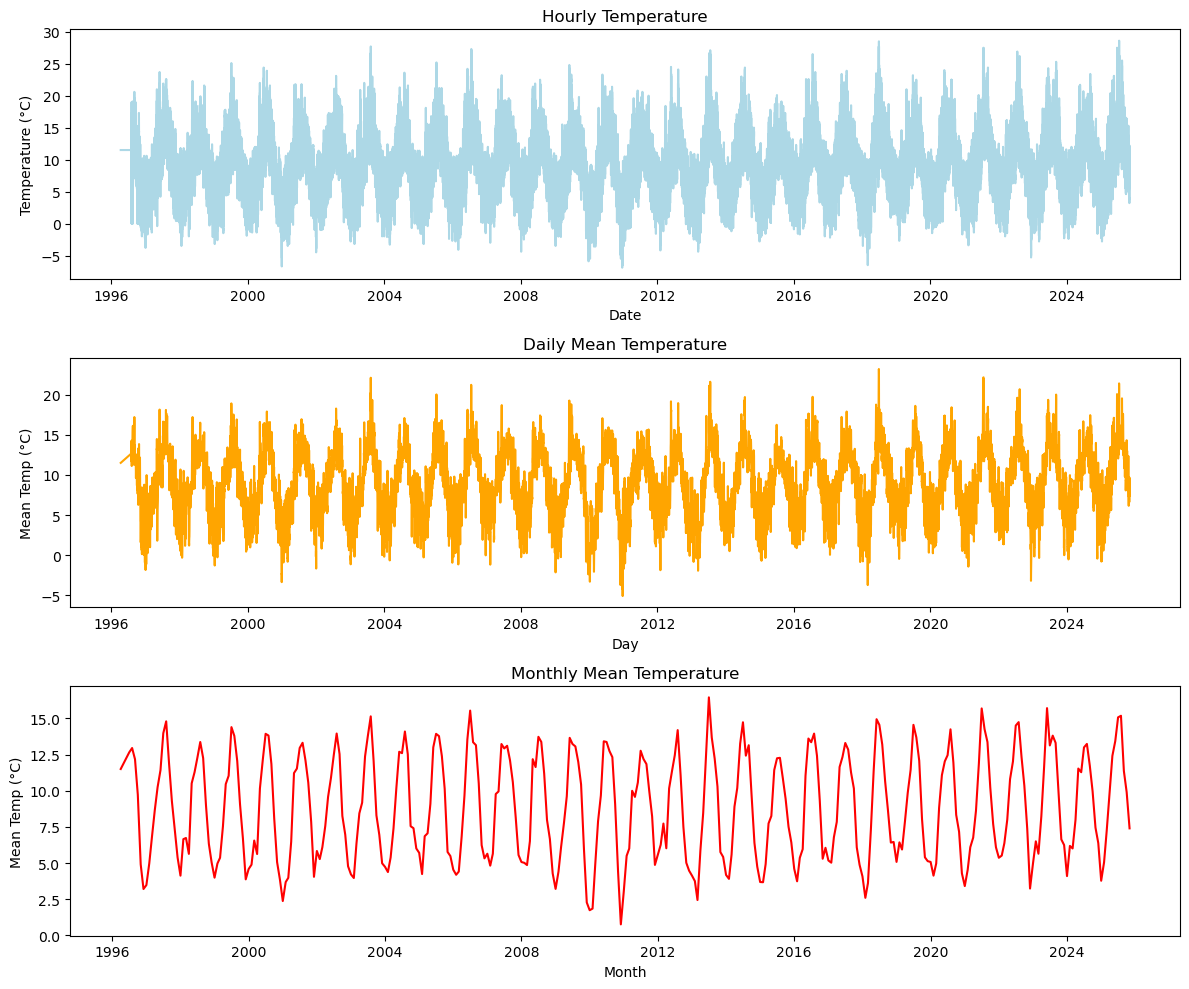

In [41]:
import matplotlib.pyplot as plt
import pandas as pd

df['date'] = pd.to_datetime(df['date'], errors='coerce')

# Daily mean temperature
df['day'] = df['date'].dt.date
daily_mean = df.groupby('day')['temp'].mean().reset_index()

# Monthly mean temperature

df['month'] = df['date'].dt.to_period('M')
monthly_mean = df.groupby('month')['temp'].mean().reset_index()
monthly_mean['month'] = monthly_mean['month'].dt.to_timestamp()

# Plots

plt.figure(figsize=(12, 10))

# Hourly temperature plot

plt.subplot(3, 1, 1)
plt.plot(df['date'], df['temp'], color='lightblue')
plt.title('Hourly Temperature')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')

# Daily mean temperature plot

plt.subplot(3, 1, 2)
plt.plot(daily_mean['day'], daily_mean['temp'], color='orange')
plt.title('Daily Mean Temperature')
plt.xlabel('Day')
plt.ylabel('Mean Temp (°C)')

# Monthly mean temperature plot

plt.subplot(3, 1, 3)
plt.plot(monthly_mean['month'], monthly_mean['temp'], color='red')
plt.title('Monthly Mean Temperature')
plt.xlabel('Month')
plt.ylabel('Mean Temp (°C)')

# Show plots
plt.tight_layout()
plt.show()

# Second Part

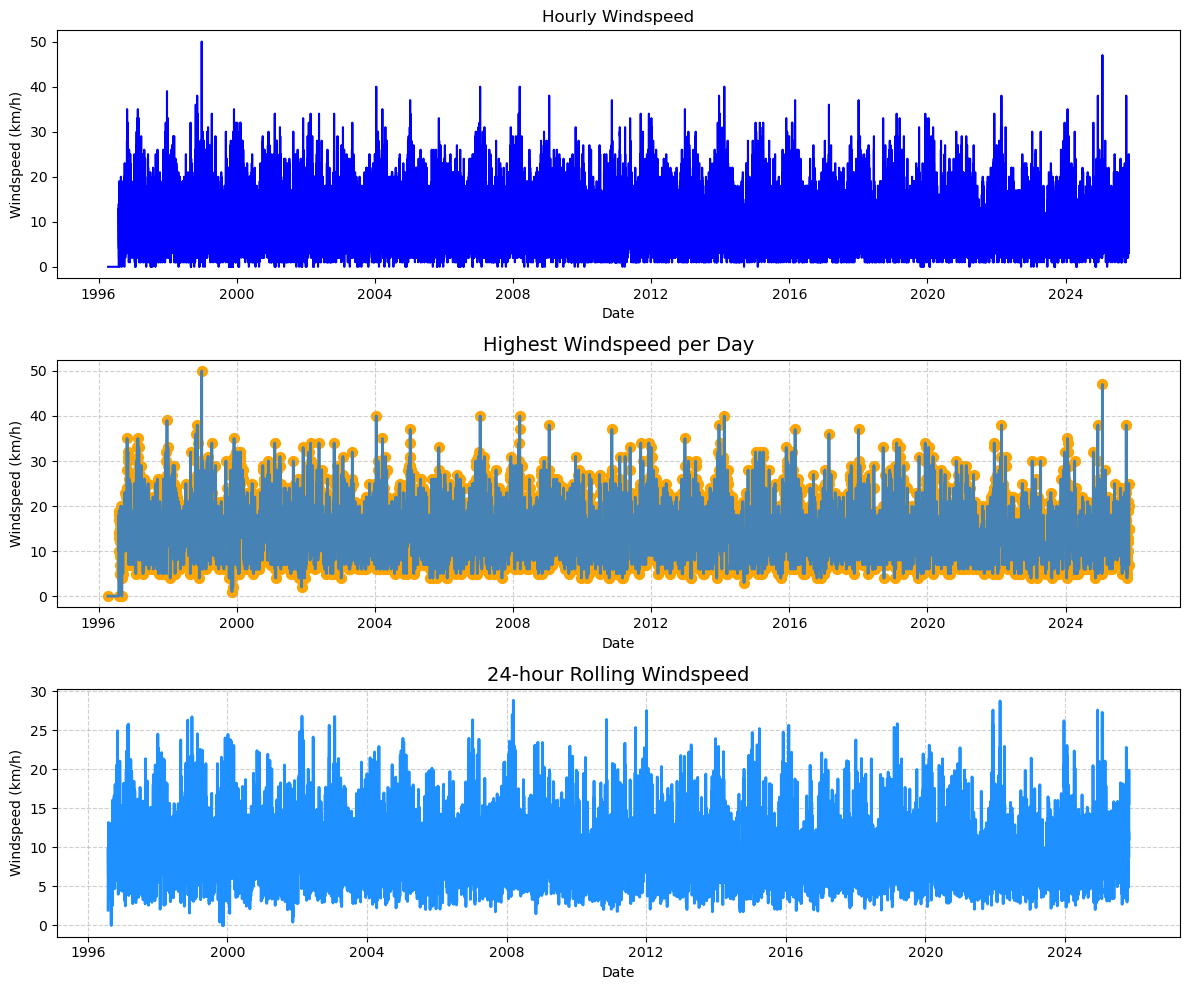

In [46]:
import pandas as pd
import matplotlib.pyplot as plt

# convert 'date' to datetime
df['date'] = pd.to_datetime(df['date'], errors='coerce')

# make sure 'wdsp' is numeric
df['wdsp'] = pd.to_numeric(df['wdsp'], errors='coerce')

# Delete NA
df = df.dropna(subset=['date', 'wdsp'])

# Sort by date
df = df.sort_values('date')

# Plot creation
plt.figure(figsize=(12, 10))

# Hourly windspeed plot
plt.subplot(3, 1, 1)
plt.plot(df['date'], df['wdsp'], color='blue')
plt.title('Hourly Windspeed')
plt.xlabel('Date')
plt.ylabel('Windspeed (km/h)')


# Get the highest windspeed per day
df['day'] = df['date'].dt.date
daily_max = df.groupby('day')['wdsp'].max().reset_index()

# Plot
plt.subplot(3, 1, 2)
plt.plot(daily_max['day'], daily_max['wdsp'], color='steelblue', linewidth=2)
plt.scatter(daily_max['day'], daily_max['wdsp'], color='orange', s=50)
plt.title('Highest Windspeed per Day', fontsize=14)
plt.xlabel('Date')
plt.ylabel('Windspeed (km/h)')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()


# Calculate 24-hour rolling windspeed
df['wdsp_rolling'] = df['wdsp'].rolling(window=24).mean()

# Plot
plt.subplot(3, 1, 3)
plt.plot(df['date'], df['wdsp_rolling'], color='dodgerblue', linewidth=2)
plt.title('24-hour Rolling Windspeed', fontsize=14)
plt.xlabel('Date')
plt.ylabel('Windspeed (km/h)')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()




# Show plot
plt.show()


# END